# (a)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 161.5, 192.5, -0.5)

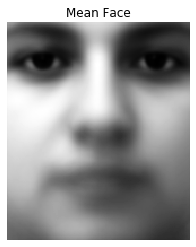

In [3]:
# calculate the mean face
neutral = []
for i in range(1,191):
    img = plt.imread(f'dataset/{i}a.jpg')
    img2 = np.array(img).flatten()
    img2 = img2.reshape(31266,1)
    neutral.append(img2)
face_matrix = np.hstack(neutral)
mean_face = np.mean(face_matrix, axis=1)
mean_face = np.array(mean_face).reshape(31266,1) # convert one-dimensional array into two-dimensional array
plt.imshow(mean_face.reshape(193,162),cmap='gray')
plt.title('Mean Face')
plt.axis('off')

Text(0.5, 1.0, 'singular values of data matrix')

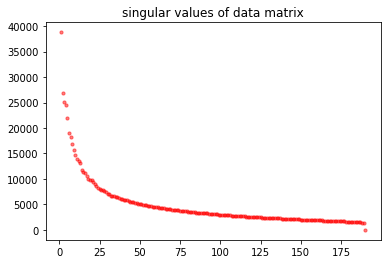

In [4]:
# calcualte the eigenvectors and eigenvalues and plot eigenvalues of data matrix A
A = face_matrix - mean_face
A_T = np.transpose(A)
C1 = np.dot(A_T,A)
eigenvectors,eigenvalues, _ = np.linalg.svd(C1)
eigenvalues = np.array(eigenvalues).reshape(190,1)
eigenvalues = np.sqrt(eigenvalues)
N = [i for i in range(1,191)]
plt.scatter(N, eigenvalues, c='r', s=10, alpha=0.5)
plt.title('singular values of data matrix')

## comment:
* Above figure is the singular values of data matrix A

Text(0.5, 0.98, 'First 8 Eigenfaces')

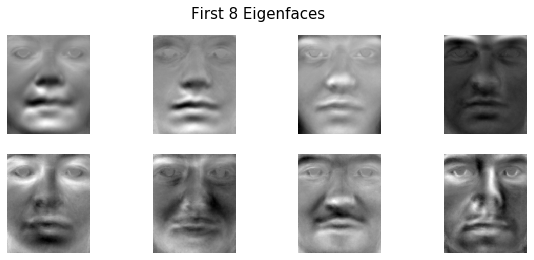

In [5]:
# show the first eight eigenfaces
vector_list = np.hsplit(eigenvectors,190)
ui_list =[]
for vi in vector_list:
    numerator = np.dot(A,vi)
    denominator = np.linalg.norm(numerator)
    ui = numerator/denominator
    ui_list.append(ui)
fig, axs = plt.subplots(2,4,figsize=(10,4))
for i in np.arange(8):
    ax = plt.subplot(2,4,i+1)
    img = ui_list[i].reshape(193,162)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
fig.suptitle("First 8 Eigenfaces", fontsize=15)

## comment:
* As we can see in the above eight eigenfaces, different picture shows different information. Mean face contain the basic information of our 190 pictures in the dataset. Eigenfaces reflect the differences between 190 pictures. So we can use eigenfaces to reconstruct faces based on meanface. Hence, 190 is much less than 31266. We achieve to use just 190 eigenfaces to reconstruct in which 190 eigenfaces are the PCs.

# (b)

In [6]:
# load the first neutral picture
img_sample = plt.imread(f'dataset/1a.jpg')
img_sample = np.array(img_sample).flatten()
img_sample = img_sample.reshape(31266,1)

In [7]:
# function of reconstructing the face
def reconst_face(N):
    j = 0
    sum = 0
    for ui in ui_list:
        j+=1
        ui_T = np.transpose(ui)
        wi = np.dot(ui_T,img_sample-mean_face)
        sum+=wi*ui
        if j == N:
            break
    reconst_face = sum + mean_face
    return reconst_face

In [8]:
# function of calculating MSE
def MSE(x,y):
    mse = ((x-y)**2).mean(axis=None)
    return mse

Text(0.5, 1.0, 'MSE')

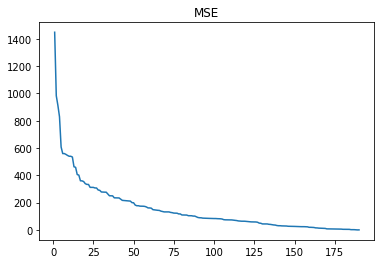

In [9]:
# plot MSE of different PCs
MSE_list=[]
N = [j for j in range(1,191)]
for i in range(1,191):
    n=i
    reconstruct_face = reconst_face(n)
    MSE_list.append(MSE(reconstruct_face,img_sample))
plt.plot(N,MSE_list)
plt.title('MSE')

In [10]:
mse_min= min(MSE_list)
mse_min

8.664484979185297e-26

## comment:
* All of 190 PCs come from the 190 neutral images. So they are suitable for reconstructing any neutral image. But the performance 
  will vary with the number of PCs that we used. Clearly in the figure, when we use more PCs, we get better MSE. When we use all PCs,
  the MSE is almost zero.

# (c)

In [37]:
# load data from smiling dataset
img = plt.imread(f'dataset/1b.jpg')
img_smile = np.array(img).flatten()
img_smile = img_smile.reshape(31266,1)

In [38]:
# function of reconstructing the face
def reconst_face_smile(N):
    j = 0
    sum = 0
    for ui in ui_list:
        j+=1
        ui_T = np.transpose(ui)
        wi = np.dot(ui_T,img_smile-mean_face)
        sum+=wi*ui
        if j == N:
            break
    reconst_face = sum + mean_face
    return reconst_face

Text(0.5, 1.0, 'MSE')

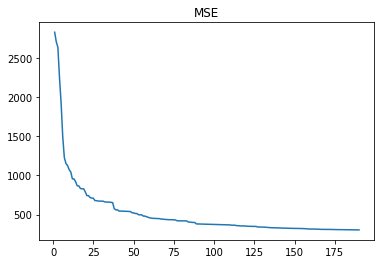

In [39]:
# reconstruct smiling faces and calculate MSE
MSE_list=[]
N = [j for j in range(1,191)]
for i in range(1,191):
    n=i
    reconstruct_face = reconst_face_smile(n)
    MSE_list.append(MSE(reconstruct_face,img_smile))

plt.plot(N,MSE_list)
plt.title('MSE')

In [40]:
mse_min= min(MSE_list)
mse_min

305.4495041107934

## comment:
* All of 190 PCs come from the 190 neutral images. So they may be not suitable for reconstructing smiling image. And the performance 
  will vary with the number of PCs that we used. Clearly in the figure, when we use more PCs, we get better MSE. But it is worth 
  noting that the MSE is larger than the MSE in reconstructing one of 190 neutral image. Even if we use all 190 PCs, the MSE is much    larger than zero.

# (d)

In [41]:
# load data from another 10 pictures dataset
img = plt.imread(f'dataset/196a.jpg')
img_10 = np.array(img).flatten()
img_10 = img_10.reshape(31266,1)

In [42]:
# function of reconstructing the face
def reconst_face_10(N):
    j = 0
    sum = 0
    for ui in ui_list:
        j+=1
        ui_T = np.transpose(ui)
        wi = np.dot(ui_T,img_10-mean_face)
        sum+=wi*ui
        if j == N:
            break
    reconst_face = sum + mean_face
    return reconst_face

Text(0.5, 1.0, 'MSE')

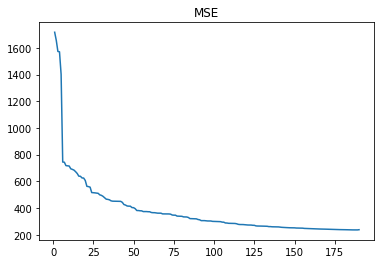

In [43]:
# reconstruct one of 10 faces and calculate MSE
MSE_list=[]
N = [j for j in range(1,191)]
for i in range(1,191):
    n=i
    reconstruct_face = reconst_face_10(n)
    MSE_list.append(MSE(reconstruct_face,img_10))

plt.plot(N,MSE_list)
plt.title('MSE')

In [44]:
mse_min= min(MSE_list)
mse_min

235.60229580939196

## comment:
* All of 190 PCs come from the 190 neutral images. So they may be not suitable for reconstructing another 10 image. And the performance 
  will vary with the number of PCs that we used. Clearly in the figure, when we use more PCs, we get better MSE. But it is worth 
  noting that the MSE is larger than the MSE in reconstructing one of 190 neutral image.Even if we use all 190 PCs, the MSE is much    larger than zero.

# (e)

Text(0.5, 1.0, 'car1')

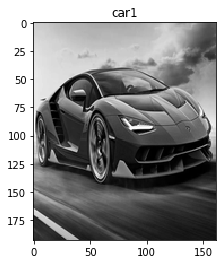

In [45]:
# load data-car picture
from PIL import Image 
car1_img = Image.open(f'car_dataset/car_1.jpg').convert('L')
car1_img = car1_img.resize((162,193), Image.ANTIALIAS)
car1_img = np.array(car1_img).flatten()
car1_img = car1_img.reshape(31266,1)
plt.imshow(car1_img.reshape(193,162),cmap='gray')
plt.title('car1')

Text(0.5, 1.0, 'reconst Car')

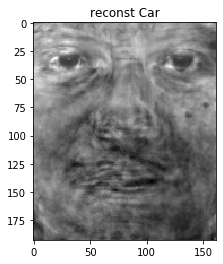

In [46]:
# reconstruct car picture
sum = 0
for ui in ui_list:
    ui_T = np.transpose(ui)
    wi = np.dot(ui_T,car1_img-mean_face)
    sum+=wi*ui
reconst_car = sum + mean_face
plt.imshow(reconst_car.reshape(193,162),cmap='gray')
plt.title('reconst Car')

In [47]:
mse= MSE(reconst_car,car1_img)
mse

3213.2687430056117

## comment:
* We can see that the reconstructed performance is really bad both on the reconstructed figure and the MSE. Because tha car picture 
  is really far away from face picture in mean face and eigenfaces.

# (f)

Text(0.5, 0.98, 'Rotated faces')

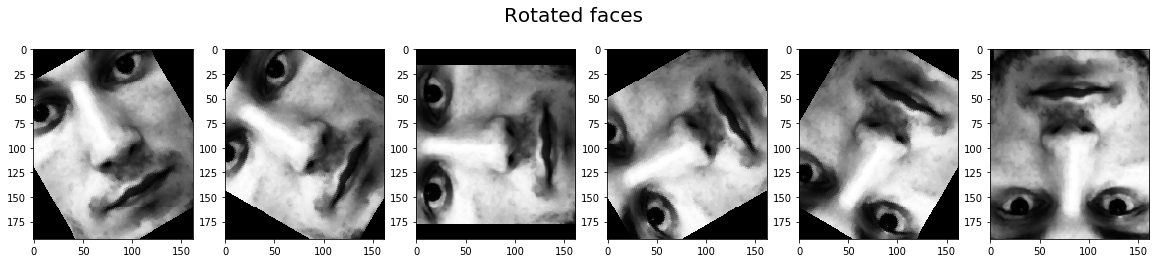

In [48]:
# rotate pictures in 30, 60, 90, 120, 150, 180 degrees
fig, axs = plt.subplots(1,6,figsize=(20,4))
for i in np.arange(6):
    ax = plt.subplot(1,6,i+1)
    img = Image.open(f'dataset/2a.jpg')
    img_r = img.rotate(30*(i+1))
    img_r = np.array(img_r).flatten()
    img_r = img_r.reshape(31266,1)
    plt.imshow(img_r.reshape(193,162),cmap='gray')
fig.suptitle("Rotated faces", fontsize=20)

Text(0.5, 0.98, 'Reconstructed rotated faces')

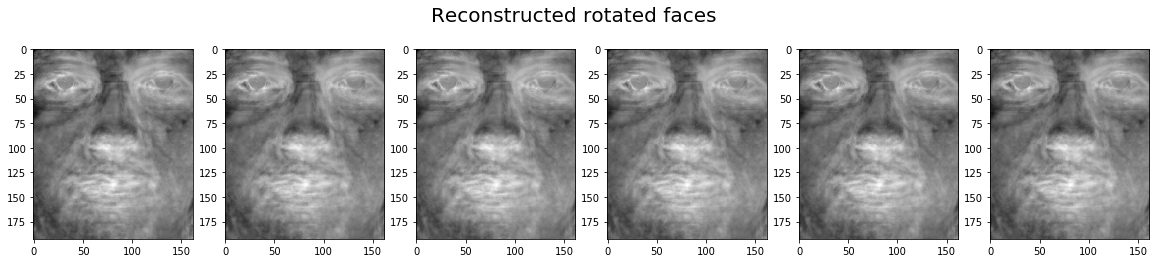

In [50]:
# reconstruct rotated pictures
fig, axs = plt.subplots(1,6,figsize=(20,4))
for i in np.arange(6):
    ax = plt.subplot(1,6,i+1)
    img = Image.open(f'dataset/2a.jpg')
    img_r = img.rotate(30*(i+1))
    img_r = np.array(img_r).flatten()
    img_r = img_r.reshape(31266,1)
    for ui in ui_list:
        ui_T = np.transpose(ui)
        wi = np.dot(ui_T,img_r-mean_face)
        sum+=wi*ui
    reconst_face = sum + mean_face  
    plt.imshow(reconst_face.reshape(193,162),cmap='gray')
fig.suptitle("Reconstructed rotated faces", fontsize=20)

## comment:
* We implemented rotating six degrees on the same picture which degrees are 30,60,90,120,150,180.Clearly, we can conclude that PCA 
  is not robust to reconstruct rotated images.